In [1]:
import pandas as pd

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

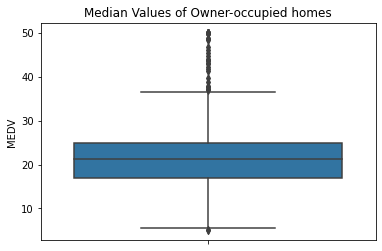

In [6]:
ax = sns.boxplot(y='MEDV', data=boston_df)
plt.title("Median Values of Owner-occupied homes");

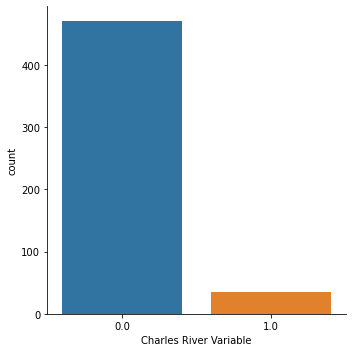

In [7]:
sns.catplot(x='CHAS', kind='count', data=boston_df)
plt.xlabel("Charles River Variable");

In [8]:
boston_df.loc[(boston_df.AGE <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[((boston_df.AGE > 35)&(boston_df.AGE < 70)), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df.AGE >= 70), 'age_group'] = '70 years and older'

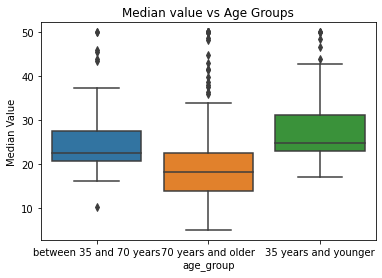

In [9]:
ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df)
plt.title("Median value vs Age Groups")
plt.ylabel("Median Value");

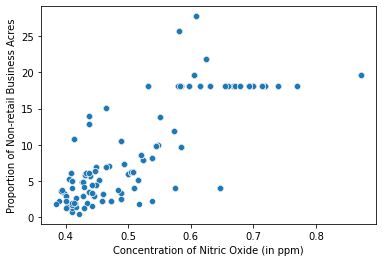

In [10]:
ax = sns.scatterplot(y='INDUS', x='NOX', data=boston_df)
plt.xlabel("Concentration of Nitric Oxide (in ppm)")
plt.ylabel("Proportion of Non-retail Business Acres");

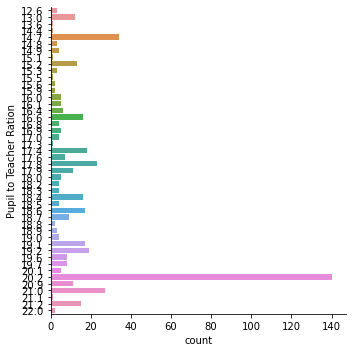

In [11]:
sns.catplot(y="PTRATIO", kind="count", data=boston_df)
plt.ylabel("Pupil to Teacher Ration");

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


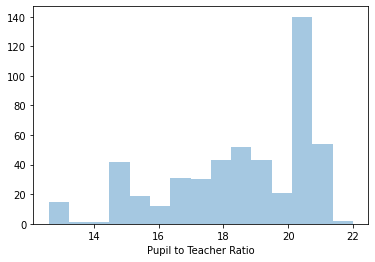

In [13]:
sns.distplot(boston_df.PTRATIO, kde=False, bins=15)
plt.xlabel("Pupil to Teacher Ratio");

In [14]:
import scipy.stats

Queation 1.
Stating Hypothesis
 (H_0: µ_1 = µ_2) ("there is no difference in between the median value of houses bounded by Charles river and not bounded.")
 (H_a: µ_1 ≠ µ_2\) ("there is a difference in between the median value of houses bounded by Charles river and not bounded.")
Setting α to 0.05

In [15]:
scipy.stats.ttest_ind(boston_df[boston_df.CHAS == 1].MEDV,
                     boston_df[boston_df.CHAS == 0].MEDV)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

Qustion1.Conclusion: Since the p-value is less than 0.05, we will reject the null hypothesis

Queation 2.
Stating Hypothesis
  Null Hypothesis: There is no difference in median values of houses for occupied units built prior to 1940.
  Alternative Hypothesis: There is a difference in median values of houses for occupied units built prior to 1940.
Setting alpha = 0.05

In [16]:
boston_df.loc[(boston_df.AGE > 81), 'age_span'] = 'before 1940'
boston_df.loc[(boston_df.AGE <= 81), 'age_span'] = 'after 1940'

In [17]:
scipy.stats.levene(boston_df[boston_df.age_span=='before 1940']['MEDV'],
                  boston_df[boston_df.age_span=='after 1940']['MEDV'],
                  center='mean')

LeveneResult(statistic=1.587082228964904, pvalue=0.2083265383143275)

Question2.Conclusion: Since the p-value is greater than 0.05, we fail to reject the null hypothesis

Queation 3.
Stating Hypothesis:
 Null Hypothesis: There is no relationship between Nitric Oxide concentration and proportion of non-retail business acres per town.
 Alternative Hypothesis: There is a relationship between Nitric Oxide concentration and proportion of non-retail business acres per town.
Setting alpha to 0.05

In [18]:
scipy.stats.pearsonr(boston_df.NOX, boston_df.INDUS)

(0.763651446920915, 7.913361061239593e-98)

Queation 3.Conclusion: Since the p-value is greater than 0.05, we can reject the null hypothesis

In [23]:
conda install -c conda-forge statsmodels

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Miniconda3

  added / updated specs:
    - statsmodels


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.6.15  |       h5b45459_0         188 KB  conda-forge
    certifi-2022.6.15          |     pyhd8ed1ab_1         154 KB  conda-forge
    conda-4.14.0               |   py39hcbf5309_0         1.0 MB  conda-forge
    openssl-1.1.1q             |       h8ffe710_0         5.8 MB  conda-forge
    patsy-0.5.2                |     pyhd8ed1ab_0         188 KB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    statsmodels-0.13.2         |   py39h5d4886f_0        10.3 MB  conda-forge
    ------------------------------------------------------------
                      

In [25]:
import statsmodels.api as sm

X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 30 Aug 2022   Prob (F-statistic):           1.21e-08
Time:                        20:05:31   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Question 4.
Conclusion: There is an additional impact of 1.0916 of weighted distance to the five Boston employment centres on the median value of owner occupied homes.